<a href="https://colab.research.google.com/github/lucasdataanalytics/Data-Science-Pyhton/blob/main/An%C3%A1lise_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Passo 1 - Bibliotecas**

### **Passo 1.1 - Instalar bibliotecas**

In [3]:
!pip install yfinance
!pip install python-bcb
!pip install mplcyberpunk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


### **Passo 1.1 - Importar bibliotecas**

In [5]:
import pandas as pd
import yfinance as yf
from bcb import sgs
from bcb import currency
import datetime
import numpy as np

## **Passo 2 - Pegar dados do dólar**


In [ ]:
cotacao_dolar = currency.get({"USD": 1}, start= datetime.datetime(2014, 9, 17), end = datetime.datetime.now())

cotacao_dolar

## **Passo 3 - Pegar dados do Yahoo Finance**

In [7]:
dados_yahoo_finance = yf.download(["^BVSP", "^GSPC", "SPHD", "GLD", "BTC-USD", "QQQ"], end = "2024-10-01")['Adj Close']
dados_yahoo_finance = dados_yahoo_finance.dropna()
dados_yahoo_finance

[*********************100%***********************]  6 of 6 completed


Ticker,BTC-USD,GLD,QQQ,SPHD,^BVSP,^GSPC
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,117.540001,91.697273,20.963423,59108.0,2001.569946
2014-09-18 00:00:00+00:00,424.440002,117.779999,92.388245,20.997282,58374.0,2011.359985
2014-09-19 00:00:00+00:00,394.795990,117.089996,92.330994,21.044704,57789.0,2010.400024
2014-09-22 00:00:00+00:00,402.152008,116.849998,91.472137,20.983736,56818.0,1994.290039
2014-09-23 00:00:00+00:00,435.790985,117.599998,91.222824,20.855055,56541.0,1982.770020
...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,64301.968750,246.070007,485.369995,50.299999,132156.0,5732.930176
2024-09-25 00:00:00+00:00,63143.144531,245.729996,485.820007,50.009998,131586.0,5722.259766
2024-09-26 00:00:00+00:00,65181.019531,246.979996,489.470001,50.080002,133010.0,5745.370117


## **Passo 4 - Transformar ativos dolarizados para reais**

In [8]:
# Remover fuso horário de ambos os dataframes
cotacao_dolar.index = cotacao_dolar.index.tz_localize(None)
dados_yahoo_finance.index = dados_yahoo_finance.index.tz_localize(None)

# Ajustar valores com base na cotação do dólar, exceto para ^BVSP
for ativo in dados_yahoo_finance.columns:
    if ativo != "^BVSP":
        dados_yahoo_finance[ativo] = dados_yahoo_finance[ativo] * cotacao_dolar["USD"]

# Renomear BTC-USD para BTC-BRL
if 'BTC-USD' in dados_yahoo_finance.columns:
    dados_yahoo_finance.columns = dados_yahoo_finance.columns.str.replace('BTC-USD', 'BTC-BRL')

# Exibir dados ajustados
dados_yahoo_finance


Ticker,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC
Date,,,,,,
2014-09-17,1069.429860,274.855538,214.424904,49.020868,59108.0,4680.471162
2014-09-18,1004.564598,278.761701,218.664497,49.696367,58374.0,4760.486813
2014-09-19,933.929394,276.988095,218.418199,49.783353,57789.0,4755.802298
2014-09-22,959.936843,278.920946,218.343992,50.088178,56818.0,4760.370323
2014-09-23,1047.031421,282.545756,219.171957,50.106355,56541.0,4763.803249
...,...,...,...,...,...,...
2024-09-24,351744.629456,1346.052154,2655.070947,275.151056,132156.0,31360.274648
2024-09-25,345620.315906,1345.027705,2659.184392,273.734727,131586.0,31321.361053
2024-09-26,354662.963473,1343.867553,2663.304171,272.495306,133010.0,31261.707882


## **Passo 5 - Calcular retornos diários dos ativos do Yahoo Finance**

In [9]:
dados_yahoo_finance = dados_yahoo_finance.pct_change().dropna()

dados_yahoo_finance

Ticker,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC
Date,,,,,,
2014-09-18,-0.060654,0.014212,0.019772,0.013780,-0.012418,0.017096
2014-09-19,-0.070314,-0.006362,-0.001126,0.001750,-0.010022,-0.000984
2014-09-22,0.027847,0.006978,-0.000340,0.006123,-0.016803,0.000961
2014-09-23,0.090729,0.012996,0.003792,0.000363,-0.004875,0.000721
2014-09-24,-0.027102,-0.002854,0.012582,0.006061,0.005005,0.009678
...,...,...,...,...,...,...
2024-09-24,0.001726,0.000363,-0.008660,-0.012240,0.012162,-0.010941
2024-09-25,-0.017411,-0.000761,0.001549,-0.005147,-0.004313,-0.001241
2024-09-26,0.026164,-0.000863,0.001549,-0.004528,0.010822,-0.001905


## **Passo 6 - Pegar dados de índices fornecidos pela VAROS**

In [10]:
dados_indices = pd.read_csv("dados_indices_base_varos.csv", index_col = "data")
dados_indices.index = pd.to_datetime(dados_indices.index)
dados_indices

,IFIX,SMLL,IDIV
data,,,
2014-09-18,0.001491,-0.006742,-0.011315
2014-09-19,-0.003848,-0.001037,-0.012357
2014-09-22,-0.001248,-0.022493,-0.023075
2014-09-23,0.001461,-0.001266,-0.004856
2014-09-24,0.000324,0.002200,0.002070
...,...,...,...
2024-09-24,-0.002548,0.011052,0.011815
2024-09-25,-0.002967,-0.011486,-0.002466
2024-09-26,0.000124,0.004420,0.013115


## **Passo 7 - Pegar o retorno do CDI do banco central**

- Aqui, a função get da biblioteca sgs (do Banco Central do Brasil) é utilizada para baixar dados do CDI (Certificado de Depósito Interbancário), que é um indicador de rendimento de investimentos.

- O código { "CDI": 12 } indica que o código 12 se refere ao CDI. Este código é passado como um dicionário para a função.

In [14]:
rendimento_cdi = sgs.get({"CDI": 12}, start=datetime.datetime(2014, 9, 18))

rendimento_cdi = rendimento_cdi/100

rendimento_cdi

,CDI
Date,
2014-09-18,0.000407
2014-09-19,0.000407
2014-09-22,0.000407
2014-09-23,0.000408
2014-09-24,0.000408
...,...
2024-09-30,0.000402
2024-10-01,0.000402
2024-10-02,0.000402


## **Passo 8 - Juntar todos os dados de retorno**

In [15]:
dados_totais = dados_yahoo_finance.join(dados_indices)
dados_totais = dados_totais.join(rendimento_cdi)

dados_totais

,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC,IFIX,SMLL,IDIV,CDI
Date,,,,,,,,,,
2014-09-18,-0.060654,0.014212,0.019772,0.013780,-0.012418,0.017096,0.001491,-0.006742,-0.011315,0.000407
2014-09-19,-0.070314,-0.006362,-0.001126,0.001750,-0.010022,-0.000984,-0.003848,-0.001037,-0.012357,0.000407
2014-09-22,0.027847,0.006978,-0.000340,0.006123,-0.016803,0.000961,-0.001248,-0.022493,-0.023075,0.000407
2014-09-23,0.090729,0.012996,0.003792,0.000363,-0.004875,0.000721,0.001461,-0.001266,-0.004856,0.000408
2014-09-24,-0.027102,-0.002854,0.012582,0.006061,0.005005,0.009678,0.000324,0.002200,0.002070,0.000408
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,0.001726,0.000363,-0.008660,-0.012240,0.012162,-0.010941,-0.002548,0.011052,0.011815,0.000402
2024-09-25,-0.017411,-0.000761,0.001549,-0.005147,-0.004313,-0.001241,-0.002967,-0.011486,-0.002466,0.000402
2024-09-26,0.026164,-0.000863,0.001549,-0.004528,0.010822,-0.001905,0.000124,0.004420,0.013115,0.000402


## **Passo 9 - Calcular volatilidade histórica**

- dados_totais.std() calcula o desvio padrão de cada coluna no DataFrame dados_totais. Este desvio padrão representa a volatilidade dos retornos diários de cada ativo.

- Multiplicamos o desvio padrão por np.sqrt(252) (onde np é a biblioteca NumPy, importada anteriormente no código) para anualizar a volatilidade.

- O número 252 representa a quantidade de dias úteis em um ano (aproximadamente), o que é comum em análises financeiras para transformar uma volatilidade diária em uma anual.

 A fórmula para a volatilidade anualizada é:

  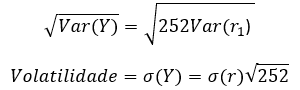




In [21]:
vol_historica = dados_totais.std() * np.sqrt(252)

vol_historica.sort_values(ascending = False)

,0
BTC-BRL,0.716873
SMLL,0.255093
QQQ,0.249634
^BVSP,0.248089
IDIV,0.237574
^GSPC,0.212047
SPHD,0.204706
GLD,0.199390
IFIX,0.083638
CDI,0.002365


## **Passo 10 - Calcular retorno histórico (acumulado e ao ano)**

- (1 + dados_totais).cumprod() - 1: Calcula o retorno acumulado dos ativos ao longo do tempo, convertendo os retornos diários em fatores de crescimento e acumulando-os ao longo do período.

- retorno_acumulado.iloc[-1, :]: Extrai o valor final do retorno acumulado, apresentando o retorno total de cada ativo ao final do período de análise.

In [16]:
retorno_acumulado = (1 + dados_totais).cumprod() - 1
retorno_acumulado = retorno_acumulado.iloc[-1, :]

retorno_acumulado

,2024-09-30
BTC-BRL,321.625599
GLD,3.817859
QQQ,11.400865
SPHD,4.620268
^BVSP,1.230087
^GSPC,5.707566
IFIX,1.249158
SMLL,0.416085
IDIV,1.311450
CDI,1.351463


### **Passo 10.1 - Calcular retorno histórico (acumulado e ao ano)**

- .cumprod() calcula o produto cumulativo desses fatores, o que mostra como o valor do investimento cresce ao longo do tempo.

- Ao multiplicar por 100, o código simula o que aconteceria se você tivesse investido exatamente 100 reais no início. O resultado final mostra o valor do investimento ao longo do tempo, refletindo o efeito dos retornos diários cumulativos.

In [17]:
investiu_100_reais = (1 + dados_totais).cumprod() * 100

investiu_100_reais

,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC,IFIX,SMLL,IDIV,CDI
Date,,,,,,,,,,
2014-09-18,93.934594,101.421169,101.977193,101.377983,98.758205,101.709564,100.149084,99.325780,98.868517,100.040741
2014-09-19,87.329654,100.775883,101.862328,101.555429,97.768492,101.609478,99.763716,99.222786,97.646811,100.081499
2014-09-22,89.761552,101.479107,101.827721,102.177257,96.125736,101.707075,99.639246,96.990968,95.393605,100.122273
2014-09-23,97.905572,102.797913,102.213854,102.214337,95.657102,101.780421,99.784813,96.868167,94.930354,100.163172
2014-09-24,95.252100,102.504523,103.499866,102.833889,96.135887,102.765471,99.817162,97.081287,95.126893,100.204087
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,32890.855443,489.730774,1238.228816,561.293727,223.583948,670.023883,224.749831,143.112168,230.292713,234.768831
2024-09-25,32318.184548,489.358051,1240.147178,558.404490,222.619612,669.192480,224.083105,141.468379,229.724829,234.863133
2024-09-26,33163.742345,488.935956,1242.068493,555.876136,225.028761,667.917968,224.110999,142.093688,232.737744,234.957473


In [18]:
#retorno ao ano

numero_de_dias = len(dados_totais)

retorno_ao_ano = (1 + retorno_acumulado) ** (252/numero_de_dias) - 1

retorno_ao_ano

,2024-09-30
BTC-BRL,0.822176
GLD,0.177420
QQQ,0.298919
SPHD,0.196412
^BVSP,0.086881
^GSPC,0.218594
IFIX,0.087842
SMLL,0.036798
IDIV,0.090934
CDI,0.092880


## **Passo 11 - Calcular retorno ajustado ao risco**

- No código, a taxa livre de risco não é explicitamente subtraída, assumindo-se que o cálculo está focado apenas na relação entre retorno e risco. A inclusão da taxa livre de risco seria importante para uma avaliação mais precisa, mas para um cálculo simplificado, a fórmula é apresentada dessa forma.

- O resultado sharpe representa o Índice de Sharpe para cada ativo, que indica o quanto de retorno adicional está sendo obtido por unidade de risco assumido.

In [22]:
sharpe = retorno_ao_ano/vol_historica

sharpe

,0
BTC-BRL,1.146892
GLD,0.889810
QQQ,1.197430
SPHD,0.959483
^BVSP,0.350200
^GSPC,1.030876
IFIX,1.050268
SMLL,0.144255
IDIV,0.382760
CDI,39.267028


## **Passo 12 - Visualizar resultados finais**

In [23]:
tabela_final = pd.concat([retorno_ao_ano, vol_historica, sharpe], axis = 1)
tabela_final.columns = ["Retorno a.a.", "Volatilidade a.a.", "Índice Sharpe"]
tabela_final.index = ["BITCOIN", "OURO", "QQQ", "DIVIDENDOS US", "IBOV", "S&P500", "IFIX", "SMALL CAPS BR",
                      "IDIV", "CDI"]
tabela_final = tabela_final.sort_values("Retorno a.a.", ascending = False)

tabela_final

,Retorno a.a.,Volatilidade a.a.,Índice Sharpe
BITCOIN,0.822176,0.716873,1.146892
QQQ,0.298919,0.249634,1.197430
S&P500,0.218594,0.212047,1.030876
DIVIDENDOS US,0.196412,0.204706,0.959483
OURO,0.177420,0.199390,0.889810
CDI,0.092880,0.002365,39.267028
IDIV,0.090934,0.237574,0.382760
IFIX,0.087842,0.083638,1.050268
IBOV,0.086881,0.248089,0.350200
SMALL CAPS BR,0.036798,0.255093,0.144255


In [24]:
df_estilizado = tabela_final.style.format({
    'Retorno a.a.': '{:.2%}',
    'Volatilidade a.a.': '{:.2%}'
})
df_estilizado = df_estilizado.background_gradient(cmap='Blues', subset=["Volatilidade a.a."])

df_estilizado

,Retorno a.a.,Volatilidade a.a.,Índice Sharpe
BITCOIN,82.22%,71.69%,1.146892
QQQ,29.89%,24.96%,1.197430
S&P500,21.86%,21.20%,1.030876
DIVIDENDOS US,19.64%,20.47%,0.959483
OURO,17.74%,19.94%,0.889810
CDI,9.29%,0.24%,39.267028
IDIV,9.09%,23.76%,0.382760
IFIX,8.78%,8.36%,1.050268
IBOV,8.69%,24.81%,0.350200
SMALL CAPS BR,3.68%,25.51%,0.144255


In [25]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

<Axes: xlabel='Date'>

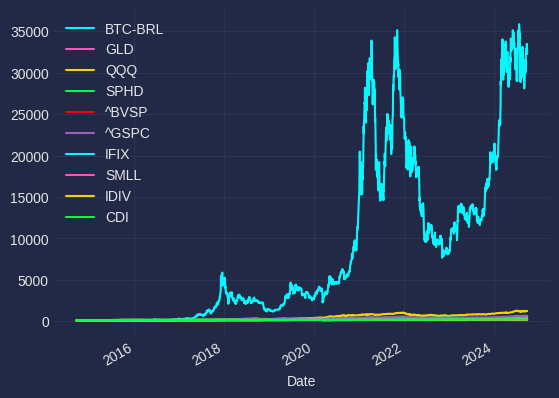

In [26]:
investiu_100_reais.plot()

<Axes: xlabel='Date'>

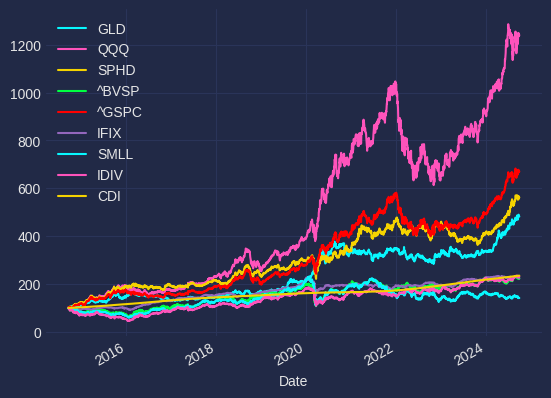

In [27]:
investiu_100_reais_ex_btc = investiu_100_reais.drop("BTC-BRL", axis = 1)
investiu_100_reais_ex_btc.plot()